In [200]:
from sklearn.datasets import load_boston
boston = load_boston()

In [201]:
print(boston.data.shape)

(506, 13)


In [202]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [203]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Model 1: Using in-build function(Linear_Regression)

In [204]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [205]:
print(X.shape)

(506, 13)


In [206]:
import numpy as np
X.shape[1]
w_cur=np.zeros(shape=(1,X.shape[1]-1))
print(w_cur)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [207]:
import sklearn
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [208]:
# standardizing data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
x_train = scaler.transform(X_train)
x_test=scaler.transform(X_test)

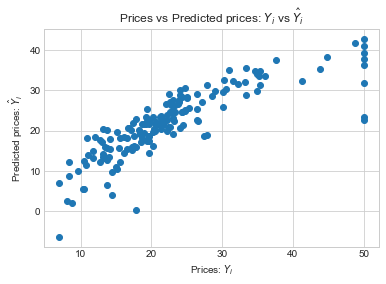

In [193]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [194]:
print(mean_squared_error(Y_test,Y_pred))

28.54136727561835


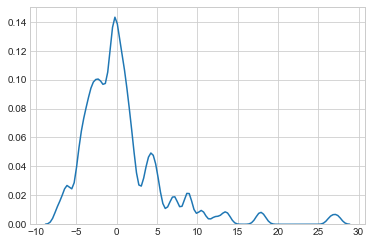

In [195]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


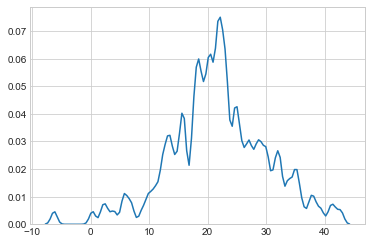

In [196]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

In [197]:
sklearn_w=lm.coef_
sklearn_w

array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

## Model 2: SGD implementation for Linear Regression

In [212]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [213]:
# standardizing data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [214]:
project_data_train=pd.DataFrame(x_train)
project_data_train['price']=y_train
project_data_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.407596,-0.494015,-0.972849,-0.281546,-0.925264,0.491559,-0.454164,0.303647,-0.775754,-0.954770,-0.032021,0.398890,-0.855058,26.6
1,-0.402053,-0.494015,0.406495,3.551814,-0.038367,-0.421878,0.915750,-0.432608,-0.549825,-0.785916,-1.028037,0.447124,0.731788,21.5
2,1.465724,-0.494015,1.024266,-0.281546,1.094403,0.227886,1.141041,-0.934064,1.596503,1.484888,0.774277,-3.428882,2.282411,7.2


In [215]:
def SGD_linear_Regression(project_data_train, iteration = 1000, learning_rate=0.001, k=10):
    
    w_weight = np.zeros(shape=(1,project_data_train.shape[1]-1))
    b_intercept = 0
    n = 1
    while n < iteration:
        w_old_weight = w_weight
        b_old_intercept = b_intercept
        temp=project_data_train.sample(k)
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        w_delta=np.zeros(shape=(1,project_data_train.shape[1]-1))
        b_delta = 0
        for i in range(k):
            # this is the differencial w.r.t weight and intercept
            w_delta+=x[i]*(y[i]-(np.dot(w_old_weight,x[i])+b_old_intercept))*(-2/k)
            b_delta+=(y[i]-(np.dot(w_old_weight,x[i])+b_old_intercept))*(-2/k)
            
        #updating the weight and the intercept
        w_weight = w_old_weight -(learning_rate*w_delta)
        b_intercept = b_old_intercept - (learning_rate*b_delta)
        #decreasing the learning_rate with each iteration
        
        if (w_old_weight==w_weight).all():
            break
        else:
            n+=1
    return w_weight,b_intercept

In [216]:
def predict(x,w,b):
    y_data_pred = []
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_data_pred.append(y)
    return np.array(y_data_pred)

In [217]:
Y=load_boston().target
X=load_boston().data

x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.3)
x1_train,x1_cv,y1_train_,y1_cv_=train_test_split(x1_train,y1_train,test_size=0.3)

x1_train = scaler.transform(x1_train)
x1_cv=scaler.transform(x1_cv)

x1_train_=np.array(x1_train)
x1_train_data=pd.DataFrame(x1_train)
x1_train_data['price']=y1_train_

x1_cv_data=pd.DataFrame(x1_cv)
x1_cv_data['price']=y1_cv_

y1_train_=np.array(y1_train_)
y1_cv_=np.array(y1_cv_)

### Tuning the hyperparameter: Learning_rate

In [180]:
from sklearn.metrics import mean_squared_error
r=[0.000001,0.00001,0.0001,0.001,0.01,0.1]
train_error_learning_rate=[]
cv_error_learning_rate=[]
for itr in r:
    w,b=SGD_linear_Regression(x1_train_data,learning_rate=itr,iteration=1000)
    # print(w.shape,b.shape,x1_train_.shape)
    y1_pred_train=predict(x1_train_,w,b)
    train_error_learning_rate.append(mean_squared_error(y1_train_,y1_pred_train))
    w,b=SGD_linear_Regression(x1_cv_data,learning_rate=itr,iteration=1000)
    y1_pred_cv=predict(x1_cv,w,b)
    cv_error_learning_rate.append(mean_squared_error(y1_cv_,y1_pred_cv))

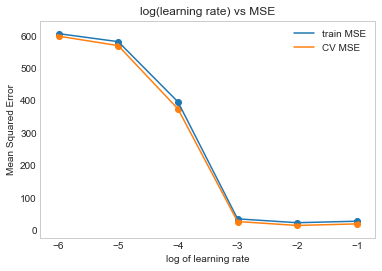

In [181]:
  # plotting obtained values
import math
import matplotlib.pyplot as plt 

r=[0.000001,0.00001,0.0001,0.001,0.01,0.1]
x1=[math.log10(i) for i in r]
plt.plot(x1,train_error_learning_rate,label='train MSE')
plt.plot(x1,cv_error_learning_rate,label='CV MSE')
plt.scatter(x1,train_error_learning_rate)
plt.scatter(x1,cv_error_learning_rate)
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')
plt.title('log(learning rate) vs MSE')
plt.grid()
plt.show()

1) Clearly, from the above plot the optimal learning_rate is at 0.001

### Tuning the hyperparameter: Batch_size

In [182]:
from sklearn.metrics import mean_squared_error
r=[5,10,15,20,25,30]
train_error_batch_size=[]
cv_error_batch_size=[]
for i in r:
    w_train,b_train=SGD_linear_Regression(x1_train_data,learning_rate=0.001,iteration=1000,k=i)
    # print(w.shape,b.shape,x1_train_.shape)
    y1_pred_train=predict(x1_train_,w_train,b_train)
    train_error_batch_size.append(mean_squared_error(y1_train_,y1_pred_train))
    w_cv,b_cv=SGD_linear_Regression(x1_cv_data,learning_rate=0.001,iteration=1000,k=i)
    y1_pred_cv=predict(x1_cv,w_cv,b_cv)
    cv_error_batch_size.append(mean_squared_error(y1_cv_,y1_pred_cv))

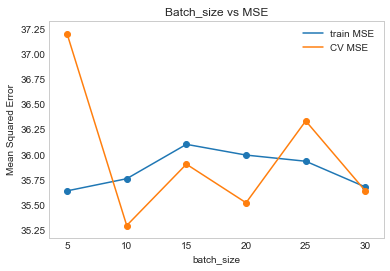

In [136]:
  # plotting obtained values
import math
import matplotlib.pyplot as plt 


x1=[5,10,15,20,25,30]
plt.plot(x1,train_error_batch_size,label='train MSE')
plt.plot(x1,cv_error_batch_size,label='CV MSE')
plt.scatter(x1,train_error_batch_size)
plt.scatter(x1,cv_error_batch_size)
plt.legend()
plt.xlabel('batch_size')
plt.ylabel('Mean Squared Error')
plt.title('Batch_size vs MSE')
plt.grid()
plt.show()

1) clearly from the above plot the optimal batch_size is 10

### Linear Regression using  optimal hyperparameters

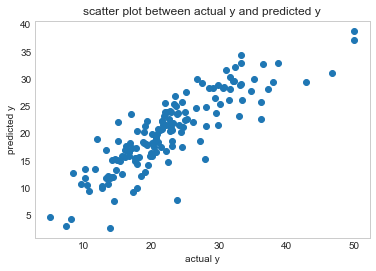

In [218]:
w_custom,b_custom = SGD_linear_Regression(project_data_train,iteration = 1000, learning_rate=0.001, k=10)
y_pred=predict(x_test,w_custom,b_custom)
plt.scatter(y_test,y_pred)
plt.grid()
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()  

In [219]:

print(mean_squared_error(y_test,y_pred))

22.31435625769158


## Comparing the models

In [220]:
print(w)
print(sklearn_w)

[[-0.66659603  0.44390491 -0.64203021  0.88909249 -0.71406027  3.08045943
  -0.17288506 -1.34813209  0.5170901  -0.35775856 -1.6557073   0.7259176
  -3.17179154]]
[-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]


In [225]:
from prettytable import PrettyTable
p = print()
x=PrettyTable()
x.field_names=['Model','Weight','MSE']
x.add_row(['sklearn',sklearn_w,mean_squared_error(Y_test,Y_pred)])
x.add_row(['custom',w_custom,mean_squared_error(y_test,y_pred)])
print(x)


+---------+---------------------------------------------------------------------------+-------------------+
|  Model  |                                   Weight                                  |        MSE        |
+---------+---------------------------------------------------------------------------+-------------------+
| sklearn |      [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01     | 28.54136727561835 |
|         |       -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00     |                   |
|         |        3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02     |                   |
|         |                              -4.72644280e-01]                             |                   |
|  custom | [[-0.67537066  0.79096631 -0.28769775  0.98799505 -0.68028095  3.25953685 | 22.31435625769158 |
|         |    0.21443787 -1.48595301  0.42857991 -0.32513883 -1.93560932  0.76526896 |                   |
|         |                

1) Clearly, From the above both the models obtained are almost similar.

2) The tuning of both the hyperparameters learning rate and batch size for the SGD could have resulted in a better MSE value.